# STUDENT DATA NOTEBOOK
This notebook contains methods and algorithms for data exploration, clean, preparation, and visualization functionalities to inspect the data. 

We will start by importing the necessary libraries and loading the data..


## IMPORT LIBRARIES
First import necessary libraries: pandas, numpy, seaborn, etc:

In [3]:
!pip install scikit-learn

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import HTML

# Importing scikit-learn for additional functionality
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Align the table to the left
style = "<style>table {float:left;}</style>"
HTML(style)


## LOAD DATA
Loading Data into a DataFrame using pandas

In [4]:
# Read in data path 
student_data_path = '../data/student_data_raw.csv'

# Load data into dataframe
students_df = pd.read_csv(student_data_path)

## EXPLORATORY DATA ANALYSIS
In this section, we will explore the dataset to gain insights into its structure and content. We will perform various steps such as viewing samples of the data, checking for missing values, and visualizing data distributions. 

This will help us understand the data better and prepare it for further analysis and modeling.


### Dataset Dimensions
Let's start by checking the dimensions of the dataset to understand its size in terms of rows and columns.


In [5]:
print(f"DataFrame dimensions: {students_df.shape}")

DataFrame dimensions: (395, 34)


The dataset contains 395 rows and 34 columns.


### View Samples of the Dataset
Let's take a look at the first few rows, last few rows, and a random sample of rows to get a better understanding of the dataset's structure and content.


In [6]:
# First set option to display all columns
pd.set_option('display.max_columns', None)

In [7]:
# Display first 5 lines
students_df.head() 

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,2,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,3,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,4,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,5,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [8]:
# Display last 5 lines
students_df.tail() 

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,391,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,392,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,393,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,394,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,395,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


In [9]:
# Display 5 random rows
students_df.sample(5) 

,id,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
239,240,GP,M,18,U,GT3,T,2,2,other,services,reputation,father,1,2,1,no,no,no,no,yes,no,yes,no,5,5,4,3,5,2,0,7,7,0
125,126,GP,M,15,U,GT3,T,3,4,services,services,home,father,1,1,0,yes,no,no,no,yes,yes,yes,no,5,5,5,3,2,5,0,13,13,12
10,11,GP,F,15,U,GT3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,1,2,2,0,10,8,9
293,294,GP,F,17,R,LE3,T,3,1,services,other,reputation,mother,2,4,0,no,yes,yes,no,yes,yes,no,no,3,1,2,1,1,3,6,18,18,18
196,197,GP,M,17,U,GT3,T,4,4,services,teacher,home,mother,1,1,0,no,no,no,no,yes,yes,yes,no,5,2,3,1,2,5,4,17,15,16


### Observations from the Dataset

**GENERAL OBSERVATION**  
Each record represents an individual student, with various attributes including demographics, family background, and academic performance across three separate exams.

**DATA TYPE**  
The dataset contains a mix of numerical and categorical variables. We will need to preprocess the categorical variables for analysis and modeling.

**CONSISTENCY**  
The data appears to be consistent based on the initial inspection. A thorough check on the entire dataset will be needed to confirm that all categorical values are standardized and numerical values are correctly formatted.

**ORDER**  
The data is not ordered chronologically or sequentially, as there are no timestamps or dates indicating a specific order.

**MISSING VALUES**  
The data seems to be complete in the sampled rows. We will confirm this with a thorough review and account for any missing values.


### Column and Data Review

Now we will explore the column and datatypes in more detail

In [10]:
# Print column names
students_df.columns

Index(['id', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Column Names
Column names and descriptions are listed below.


| Column | Description |
|---|---|
| id | ID for student |
| school | School attended |
| sex | Gender |
| age | Age of student |
| address | Type of address (urban or rural) |
| famsize | Family size |
| Pstatus | Parent's cohabitation status |
| Medu | Mother's education level |
| Fedu | Father's education level |
| Mjob | Mother's job |
| Fjob | Father's job |
| reason | Reason for choosing school |
| guardian | Student's guardian |
| traveltime | Travel time to school |
| studytime | Weekly study time |
| failures | Number of past class failures |
| schoolsup | Extra educational support |
| famsup | Family educational support |
| paid | Extra paid classes |
| activities | Extra-curricular activities |
| nursery | Attended nursery school |
| higher | Wants to pursue higher education |
| internet | Internet access at home |
| romantic | In a romantic relationship |
| famrel | Quality of family relationships |
| freetime | Free time after school |
| goout | Going out with friends |
| Dalc | Workday alcohol consumption |
| Walc | Weekend alcohol consumption |
| health | Current health status |
| absences | Number of school absences |
| G1 | Grade 1 |
| G2 | Grade 2 |
| G3 | Grade 3 |




### Column Information - Column Name, Non-Null Count, Data Type

In this section, we will display the column information, including column names, the number of non-null entries, and their respective data types. This will help us understand the completeness and structure of our dataset.


In [11]:
# Running .info
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

### Column Information Review

**MISSING VALUES**  
Reviewing the non-null status of each column, the data is complete and will not require imputation.

**DATA TYPES**  
The data has a mix of `int64` and `object` data types. All `object` data types represent categorical variables and will require preprocessing for analysis and training. Additionally, the consistency of categorical data types will need to be reviewed.


### Categorical Column Analysis
Next, we will examine each categorical column and analyze the unique values to ensure data consistency.

In [17]:
# Automatically identify categorical columns
categorical_columns = students_df.select_dtypes(include=['object', 'category']).columns

# Review unique values in categorical columns
print("\nUnique values in categorical columns:")
for column in categorical_columns:
    unique_values = students_df[column].unique()
    print(f"{column}: {unique_values}")



Unique values in categorical columns:
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


### Categorical Columns Review

The unique values for each feature are consistent and well-defined. All features are either boolean or categorical, with no columns containing ordinal values. Values of 'yes' and 'no' will be converted to boolean, while all other categorical columns will be treated as categories.


#### Add Feature Average Grade
Before we continue, first create a new feature that is the average of all grades for each student. We do this to simplify our analysis and have a single measure of student performance that can be used as the target variable in our predictive models.

In [38]:
copy1_student_df = students_df.copy()
copy1_student_df['avg_G'] = students_df[['G1', 'G2', 'G3']].mean(axis=1)

copy1_student_df.head()

# Exclude the 'id' column and any other non-relevant columns
relevant_columns = students_df.drop(columns=['id', 'G1', 'G2', 'G3'])

# Run .describe() on the relevant columns
relevant_description = relevant_columns.describe()

In [27]:
# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(relevant_description)


Summary statistics for numerical columns:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139

From reviewing the statistical datal we can see that

Age: There seem to be some significant outliers that will affect model performance.  
Action to take: distribution of age to refine or clean age. May have to take out records that are out of range. 

The count of all features is complete. This further shows there are no missing values.  

From looking at averages we can see that on average

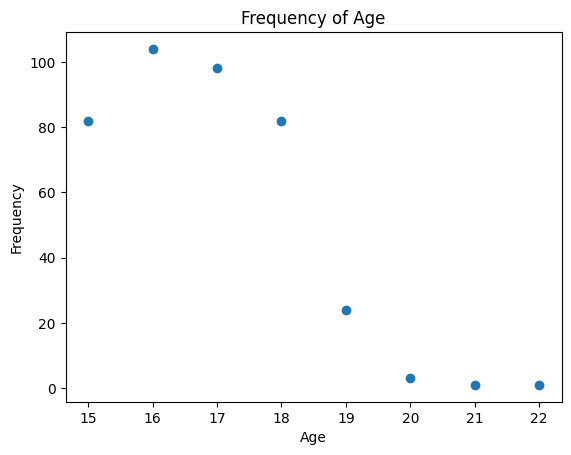

In [40]:
# Assuming 'students_df' has a column 'age'
age_counts = copy1_student_df['age'].value_counts().reset_index()
age_counts.columns = ['age', 'frequency']

# Creating the scatter plot
plt.scatter(age_counts['age'], age_counts['frequency'])
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### Clean Up
So I think from here we should basically take out anything above 19.  
2 Reasons 19 is a typical cut off age for high schools
there is very little data on a 20-22 year old
Possible error in collecting 20-22 aged students

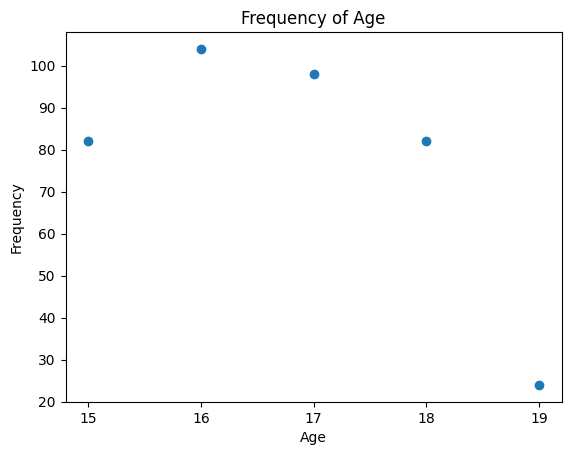

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          390 non-null    int64  
 1   school      390 non-null    object 
 2   sex         390 non-null    object 
 3   age         390 non-null    int64  
 4   address     390 non-null    object 
 5   famsize     390 non-null    object 
 6   Pstatus     390 non-null    object 
 7   Medu        390 non-null    int64  
 8   Fedu        390 non-null    int64  
 9   Mjob        390 non-null    object 
 10  Fjob        390 non-null    object 
 11  reason      390 non-null    object 
 12  guardian    390 non-null    object 
 13  traveltime  390 non-null    int64  
 14  studytime   390 non-null    int64  
 15  failures    390 non-null    int64  
 16  schoolsup   390 non-null    object 
 17  famsup      390 non-null    object 
 18  paid        390 non-null    object 
 19  activities  390 non-null    object

In [52]:
copy2_student_df = copy1_student_df[copy1_student_df['age'] <= 19]

copy2_student_df.tail()

# Assuming 'students_df' has a column 'age'
age_counts = copy2_student_df['age'].value_counts().reset_index()
age_counts.columns = ['age', 'frequency']

# Creating the scatter plot
plt.scatter(age_counts['age'], age_counts['frequency'])
plt.title('Frequency of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
# Set x-axis to show only whole numbers
plt.xticks(range(int(age_counts['age'].min()), int(age_counts['age'].max()) + 1))
plt.show()

copy2_student_df.info()

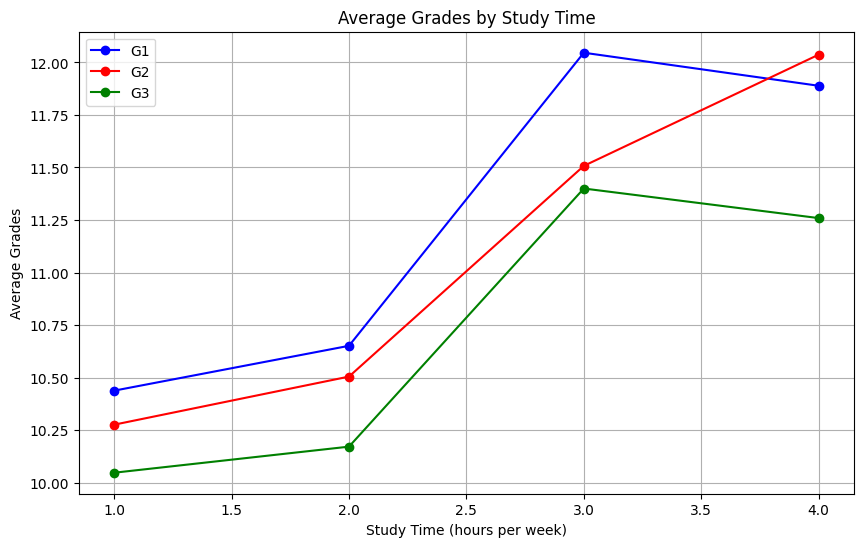

In [51]:
import matplotlib.pyplot as plt

# Group data by 'studytime' and calculate mean for each grade
grouped_data_G1 = students_df.groupby('studytime')['G1'].mean().reset_index()
grouped_data_G2 = students_df.groupby('studytime')['G2'].mean().reset_index()
grouped_data_G3 = students_df.groupby('studytime')['G3'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(10, 6))

# Plotting each grade with different colors
plt.plot(grouped_data_G1['studytime'], grouped_data_G1['G1'], marker='o', color='blue', label='G1')
plt.plot(grouped_data_G2['studytime'], grouped_data_G2['G2'], marker='o', color='red', label='G2')
plt.plot(grouped_data_G3['studytime'], grouped_data_G3['G3'], marker='o', color='green', label='G3')

# Adding title and labels
plt.title('Average Grades by Study Time')
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Average Grades')
plt.legend()  # Show legend to identify which line corresponds to which grade
plt.grid(True)

plt.show()


#### Observations from `.info()`

- **Complete Data:** All columns have 395 non-null entries, indicating that there are no missing values in the dataset.
- **Data Types:** The dataset contains both numerical (`int64`) and categorical (`object`) types. 
    - **Categorical Conversion:** Columns such as `school`, `sex`, `address`, `famsize`, etc., which are currently of type `object`, should be converted to `category` for more efficient memory usage and better performance in subsequent analyses.
    - **Boolean Conversion:** Columns representing binary choices (e.g., `internet`, `romantic`) might be more appropriately handled as `bool` types.
    - **Numerical Checks:** Ensure numerical columns like `age`, `Medu`, `Fedu`, etc., are correctly formatted and reflect the intended measurement scales.

These changes will help prepare the data for more detailed statistical analysis and machine learning modeling.


In [ ]:
# Confirm dataset completeness
students_df.isnull().sum() 

#### Observation from `.isnull().sum()`

- **No Missing Values:** The `.isnull().sum()` check confirms that all columns have zero missing values. As a result the dataset will not require imputation.

In [15]:
students_df.describe()

,id,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,198.000000,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,114.170924,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,1.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,99.500000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,198.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,296.500000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,395.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Unique Values:
df['column_name'].unique() to see the unique values of a column.
df['column_name'].nunique() to get the number of unique values.

In [16]:
# List of categorical columns
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 'romantic' 
]

# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = students_df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'school': ['GP' 'MS']
Unique values in 'sex': ['F' 'M']
Unique values in 'address': ['U' 'R']
Unique values in 'famsize': ['GT3' 'LE3']
Unique values in 'Pstatus': ['A' 'T']
Unique values in 'Mjob': ['at_home' 'health' 'other' 'services' 'teacher']
Unique values in 'Fjob': ['teacher' 'other' 'services' 'health' 'at_home']
Unique values in 'reason': ['course' 'other' 'home' 'reputation']
Unique values in 'guardian': ['mother' 'father' 'other']
Unique values in 'schoolsup': ['yes' 'no']
Unique values in 'famsup': ['no' 'yes']
Unique values in 'paid': ['no' 'yes']
Unique values in 'activities': ['no' 'yes']
Unique values in 'nursery': ['yes' 'no']
Unique values in 'higher': ['yes' 'no']
Unique values in 'internet': ['no' 'yes']
Unique values in 'romantic': ['no' 'yes']


#### Unique Values in Categorical Columns

This section reviews the unique entries for each categorical variable in the dataset. Understanding the diversity and distribution of data in these columns is crucial for:
- Identifying potential data quality issues.
- Preparing for data preprocessing steps like encoding categorical data for machine learning models.
- Gaining insights into the dataset's composition, which can influence analysis decisions.

Below are the outputs for each categorical column, detailing the unique values present:

- **School**: Lists unique schools in the dataset.
- **Sex**: Different genders recorded.
- **Address**: Types of addresses (e.g., urban, rural).
- **Famsize**: Family size variations.
- **Pstatus**: Parental cohabitation status.
- **Mjob/Fjob**: Types of jobs parents are engaged in.
- **Reason**: Reasons for choosing this school.
- **Guardian**: Who is the guardian of the student.
- **Schoolsup**: Whether school support is available.
- **Famsup**: Family support availability.
- **Paid**: Whether classes are paid.
- **Activities**: Involvement in extracurricular activities.
- **Nursery**: Attendance at a nursery school.
- **Higher**: Aspirations for higher education.
- **Internet**: Access to the internet at home.
- **Romantic**: Involvement in a romantic relationship.

Each categorical field's unique values can provide insights into the dataset's structure and indicate necessary data management steps for further analysis.


Value Counts for Categorical Data:
df['column_name'].value_counts() to see how many times each value occurs in a column.

In [17]:
# List of categorical columns
categorical_columns = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 'romantic'
]

# Print value counts for each categorical column
for column in categorical_columns:
    value_counts = students_df[column].value_counts()
    print(f"Value counts for '{column}':\n{value_counts}\n")


Value counts for 'school':
school
GP    349
MS     46
Name: count, dtype: int64

Value counts for 'sex':
sex
F    208
M    187
Name: count, dtype: int64

Value counts for 'address':
address
U    307
R     88
Name: count, dtype: int64

Value counts for 'famsize':
famsize
GT3    281
LE3    114
Name: count, dtype: int64

Value counts for 'Pstatus':
Pstatus
T    354
A     41
Name: count, dtype: int64

Value counts for 'Mjob':
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

Value counts for 'Fjob':
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

Value counts for 'reason':
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

Value counts for 'guardian':
guardian
mother    273
father     90
other      32
Name: count, dtype: int64

Value counts for 'schoolsup':
schoolsup
no     344
yes     51
Name: count, dtype: int

#### Distribution of Categorical Variables

This section examines the frequency of each category within the categorical variables of the dataset. Analyzing the value counts is crucial for:
- Assessing the balance or imbalance of categories within features.
- Identifying dominant categories which might influence the model's learning behavior.
- Preparing for data preprocessing, particularly for handling imbalanced data or applying sampling techniques.

Below are the value counts for each categorical column, showing the frequency of each category:

- **School**: Frequency of students in each school.
- **Sex**: Count of each gender.
- **Address**: Urban vs rural students.
- **Famsize**: Distribution of family sizes.
- **Pstatus**: Overview of parental cohabitation status.
- **Mjob/Fjob**: Popularity of different parent occupations.
- **Reason**: Main reasons for choosing this school.
- **Guardian**: Who are the guardians for most students.
- **Schoolsup**: Availability of school support.
- **Famsup**: How many receive family support.
- **Paid**: Proportion of students in paid classes.
- **Activities**: Participation rate in extracurricular activities.
- **Nursery**: Number of students who attended nursery.
- **Higher**: Aspiration for higher education.
- **Internet**: Access to internet at home.
- **Romantic**: Involvement in romantic relationships.

Each section helps in visualizing the data distribution and aids in making informed decisions about necessary preprocessing steps, such as encoding techniques or the need for handling class imbalance in machine learning models.


In [18]:
# Calculate the correlation of selected variables with avg_score only
correlation_matrix = students_df[['traveltime', 'studytime', 'freetime', 'avg_score']].corr().loc[['traveltime', 'studytime', 'freetime'], ['avg_score']]
print(correlation_matrix)


KeyError: "['avg_score'] not in index"

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': .5})

# Adding titles and labels for clarity
plt.title('Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Show the plot
plt.show()


In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(4, 3))  # Adjust size to fit the smaller correlation matrix

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Adding titles and labels for clarity
plt.title('Correlation with Avg_Score')
plt.xlabel('Avg_Score')
plt.ylabel('Variables')

# Show the plot
plt.show()
